In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# ...Data Reading...

In [38]:
# Reading the train data
df1=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")

# Reading the test data
df2=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

# Reading the movies data
df3=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")

# Reading the sample data
df4=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv")

In [39]:
# Printing the shape
print("Train dataset shape:",df1.shape,"\nMovies dataset shape:",df3.shape)

Train dataset shape: (162758, 5) 
Movies dataset shape: (143258, 14)


In [40]:
#Overview of dataset

#df1.head()
#df2.head()
df3.head()
#df4.head()

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN


In [41]:
#combining the csv train and movies

combined=pd.merge(df1,df3,on="movieid")
combined.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,marvelous_pirate,Sharon Foster,False,&#91;T&#93;he haphazard way this story is asse...,NEGATIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
2,marvelous_pirate,Melinda Dunn,False,The stop-motion artistry of Wendell &amp; Wild...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
3,marvelous_pirate,Mr. Wayne Smith,False,Wendell &amp; Wild is narratively overstuffed ...,NEGATIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
4,marvelous_pirate,Connor Nelson,False,For being about the Netherworlds&#44; it&#8217...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN


In [42]:
#shape of combined dataset
#combined.shape

In [43]:
combined.dtypes

movieid                  object
reviewerName             object
isFrequentReviewer         bool
reviewText               object
sentiment                object
title                    object
audienceScore           float64
rating                   object
ratingContents           object
releaseDateTheaters      object
releaseDateStreaming     object
runtimeMinutes          float64
genre                    object
originalLanguage         object
director                 object
boxOffice                object
distributor              object
soundType                object
dtype: object

In [44]:
#Descrirbing the dataset

df3.describe()

,audienceScore,runtimeMinutes
count,73248.000000,129431.000000
mean,55.674967,93.708578
std,24.553648,28.129175
min,0.000000,1.000000
25%,37.000000,84.000000
50%,57.000000,92.000000
75%,76.000000,103.000000
max,100.000000,2700.000000


# ....Cleaning and visualizing the data...

In [45]:
#checking for null values in combined dataset

df1.isnull().sum()
combined.isnull().sum()

movieid                      0
reviewerName                 0
isFrequentReviewer           0
reviewText               23817
sentiment                    0
title                        0
audienceScore           300829
rating                  390791
ratingContents          390791
releaseDateTheaters     342951
releaseDateStreaming    275844
runtimeMinutes          222688
genre                   217333
originalLanguage        220455
director                     0
boxOffice               380216
distributor             355592
soundType               415919
dtype: int64

In [46]:
print("Duplicates values:",combined.duplicated().sum())
combined = combined.drop_duplicates(subset=['movieid'])

Duplicates values: 217298


In [47]:
print("Duplicates values after dropping:",combined.duplicated().sum())

Duplicates values after dropping: 0


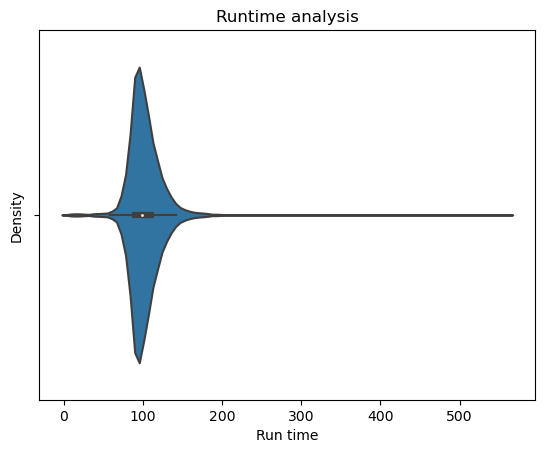

In [48]:
# Plotting 
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(data=combined,x='runtimeMinutes')
plt.title('Runtime analysis')
plt.xlabel('Run time')
plt.ylabel('Density')
plt.show()

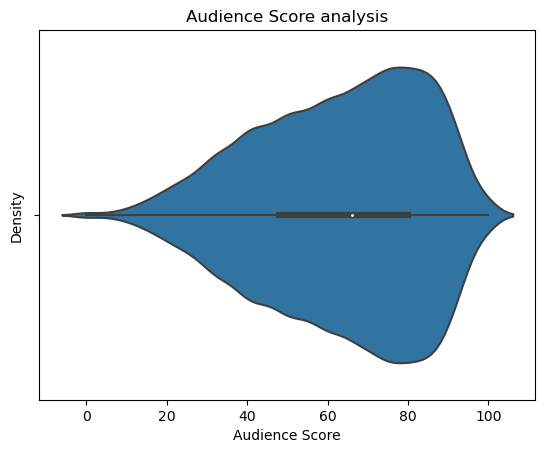

In [49]:
# plotting for audiencescore
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(data=combined,x='audienceScore')
plt.title('Audience Score analysis')
plt.xlabel('Audience Score')
plt.ylabel('Density')
plt.show()

In [50]:
#filling the row with null values

combined["reviewText"]=combined["reviewText"].fillna('')
combined["audienceScore"]=combined["audienceScore"].fillna(combined["audienceScore"].mean())
combined["runtimeMinutes"]=combined["runtimeMinutes"].fillna(combined["runtimeMinutes"].mean())
df1['reviewText']=df1['reviewText'].fillna('')

In [51]:
combined.isnull().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText                  0
sentiment                   0
title                       0
audienceScore               0
rating                  10676
ratingContents          10676
releaseDateTheaters      5891
releaseDateStreaming     2295
runtimeMinutes              0
genre                     324
originalLanguage          451
director                    0
boxOffice                8453
distributor              6816
soundType               11038
dtype: int64

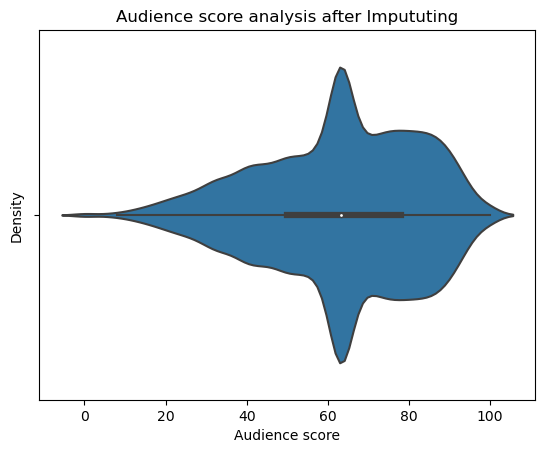

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(data=combined,x='audienceScore')
plt.title('Audience score analysis after Impututing')
plt.xlabel('Audience score')
plt.ylabel('Density')
plt.show()

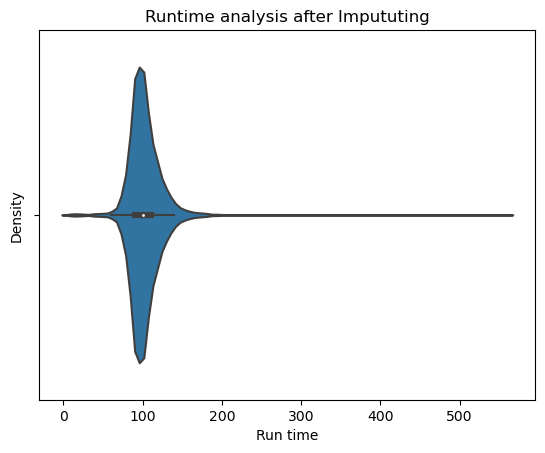

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.violinplot(data=combined,x='runtimeMinutes')
plt.title('Runtime analysis after Impututing')
plt.xlabel('Run time')
plt.ylabel('Density')
plt.show()

In [54]:
# prepocessing using label encoder

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
combined['sentiment']=encoder.fit_transform(combined['sentiment'])
df1['sentiment']=encoder.fit_transform(df1['sentiment'])
combined.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,1,Marvelous Pirate,65.000000,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
16,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,0,Tony Montana Frodo Baggins V Rocky Balboa,63.180028,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
60,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,1,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.000000,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
97,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",1,Lara Croft Glimmer,63.180028,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
217,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,1,Jason Bourne Surreal The Terminator Indiana Jones,97.000000,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


/tmp/ipykernel_32/1054465655.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(combined.corr(), annot=True)


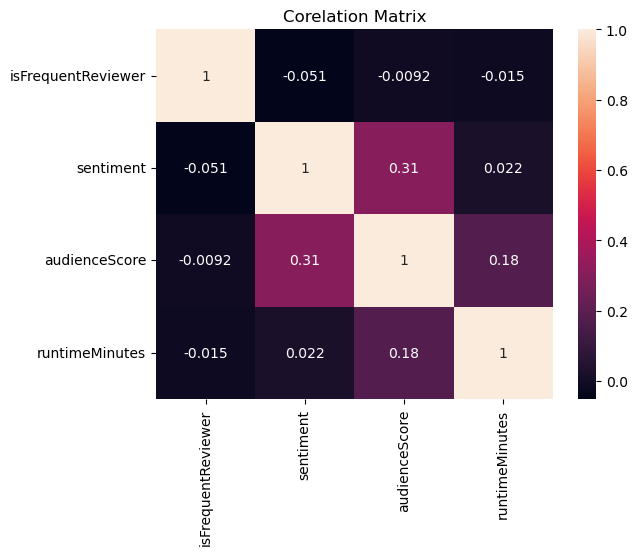

In [55]:
#finding realtion betwwen audience score and sentiment
plt.title('Corelation Matrix')
sns.heatmap(combined.corr(), annot=True)
plt.show()

In [56]:
#combined_final.isnull().sum()
df1.isnull().sum()

movieid               0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64

In [57]:
#taking value in x and y for modelling with train dataset

x=df1["reviewText"]
y=df1["sentiment"]

#using combine dataset
#x=combined_final['reviewText']
#y=combined_final['sentiment']
#using combined score:0.94(approx)

In [58]:
#Dummy classifier
'''from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

#spliting the dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

#using dummyclassifier checking accuracy
dummy=DummyClassifier(strategy="most_frequent")
dummy.fit(x_train,y_train)
y_pred=dummy.predict(x_test)
accu=accuracy_score(y_test,y_pred)
print(accu)'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.dummy import DummyClassifier\nfrom sklearn.metrics import accuracy_score\n\n#spliting the dataset into train and test\nx_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)\n\n#using dummyclassifier checking accuracy\ndummy=DummyClassifier(strategy="most_frequent")\ndummy.fit(x_train,y_train)\ny_pred=dummy.predict(x_test)\naccu=accuracy_score(y_test,y_pred)\nprint(accu)'

In [59]:
# Removing stop words
stop_word=['are','the','and','or','is','for','a','an','in','to','his','him','this','they','those','with','do','it','as','of','on']
def stop(x):
    for i in range(len(x)):
        text=x[i]
        splited_text=text.split()
        filtered=[]
        for j in splited_text:
            if j.lower() not in stop_word:
                filtered.append(j)
        combined_text = ' '.join(filtered)
        x[i]=combined_text
    return x
stop(x)
#stop(x1)

/tmp/ipykernel_32/3500481835.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i]=combined_text


0         Henry Selick’s first movie since 2009’s Corali...
1         cast that reads like Vogue Oscar party guest l...
2         Creed II does not give us anything but another...
3         I know what you're thinking, but no Limitless ...
4         Director Fernando Meirelles tells story urgenc...
                                ...                        
162753    top-notch thriller genuine surprises great, af...
162754    Some people find Derek Zoolander funny likable...
162755    fun, gentle comedy focuses mainly themes that ...
162756    film rescued by strong third act, but getting ...
162757                 peerless exercise stimulus response.
Name: reviewText, Length: 162758, dtype: object

In [60]:
'''from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(x)
#X1=vectorizer.fit_transform(x1)'''

'from sklearn.feature_extraction.text import CountVectorizer\nvectorizer = CountVectorizer()\nX = vectorizer.fit_transform(x)\n#X1=vectorizer.fit_transform(x1)'

In [61]:
#using cross validation and countvectorizer
'''from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression

#fitting the dataset for model
model_logistic=LogisticRegression(max_iter=1000,C=14,solver='saga',penalty='l2')
cross_validation = cross_val_score(model_logistic,x,y,scoring='accuracy',cv=4)

#finding the accuracy of all 4 
print(cross_validation)
print(np.mean(cross_validation))'''

#[0.79550258 0.79800934 0.79579247 0.79753742]
#0.7967104529976198

"from sklearn.model_selection import KFold,cross_val_score\nfrom sklearn.linear_model import LogisticRegression\n\n#fitting the dataset for model\nmodel_logistic=LogisticRegression(max_iter=1000,C=14,solver='saga',penalty='l2')\ncross_validation = cross_val_score(model_logistic,x,y,scoring='accuracy',cv=4)\n\n#finding the accuracy of all 4 \nprint(cross_validation)\nprint(np.mean(cross_validation))"

# ...Model Training....

In [62]:
#using tfidf vectorizer
#importing the library
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

#Converting the text into numerical
tf_vectorizer = TfidfVectorizer(ngram_range=(1,2))
tfidf_X = tf_vectorizer.fit_transform(x)

#spliting into train and test data
x_train,x_test,y_train,y_test=train_test_split(tfidf_X,y,test_size=0.1,random_state=42)

#Training the model
model=LogisticRegression(max_iter=1000,C=16,solver='saga',penalty='l2')
model.fit(x_train,y_train)

#predicting for test
y_t1=model.predict(x_test)

# converting label encoder
y_t1=encoder.inverse_transform(y_t1)
y_test=encoder.inverse_transform(y_test)

In [63]:
#finding accuracy 
print("Accuracy:",accuracy_score(y_t1,y_test))
print("F1_score:",f1_score(y_t1, y_test, average='macro'))
print(y_t1)

Accuracy: 0.8150036864094372
F1_score: 0.778319458086081
['POSITIVE' 'NEGATIVE' 'NEGATIVE' ... 'NEGATIVE' 'POSITIVE' 'NEGATIVE']


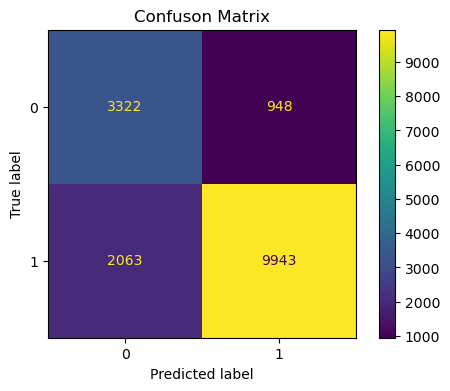

In [64]:
# Ploting the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
cf=confusion_matrix(y_t1,y_test)
fig, ax = plt.subplots(figsize=(6,4),dpi=100)
ax.set(title='Confuson Matrix')
confusion = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
confusion.plot(ax=ax);

In [65]:
#confusion matrix
print(cf)

[[3322  948]
 [2063 9943]]


In [66]:
# Applying knn

'''#importing the library
from sklearn.neighbors import KNeighborsClassifier

#applying the knn model
classifier= KNeighborsClassifier(n_neighbors=18)
classifier.fit(x_train,y_train)

#predicting the test value of knn model
y_t1=classifier.predict(x_test)

#finding accuracy
print(accuracy_score(y_t1,y_test))'''

#n=5 0.64
#n=7 0.65
#n=21 0.67, n=51 0.670 ,n=121 0.670
#n=181 0.669
# n=18 0.6698001146882936

'#importing the library\nfrom sklearn.neighbors import KNeighborsClassifier\n\n#applying the knn model\nclassifier= KNeighborsClassifier(n_neighbors=18)\nclassifier.fit(x_train,y_train)\n\n#predicting the test value of knn model\ny_t1=classifier.predict(x_test)\n\n#finding accuracy\nprint(accuracy_score(y_t1,y_test))'

In [67]:
# Applying linear svc
'''from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_svc = LinearSVC()
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)'''

# Accuracy 0.7742381420496437

'from sklearn.svm import LinearSVC\nfrom sklearn.metrics import accuracy_score\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\nmodel_svc = LinearSVC()\nmodel_svc.fit(X_train, y_train)\ny_pred = model_svc.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint("Accuracy:", accuracy)'

In [68]:
'''
# using 3 columns
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    combined[['reviewText', 'audienceScore','runtimeMinutes']],
    combined['sentiment'],
    test_size=0.2,
    random_state=42
)

from sklearn.preprocessing import RobustScaler,StandardScaler
#scaler = RobustScaler()
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(x_train[['audienceScore','runtimeMinutes']])
X_test_scaled = scaler.transform(x_test[['audienceScore','runtimeMinutes']])

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train_tfidf = vectorizer_tfidf.fit_transform(x_train['reviewText'])
X_test_tfidf = vectorizer_tfidf.transform(x_test['reviewText'])

X_train_combined = np.hstack((X_train_tfidf.toarray(),X_train_scaled))
X_test_combined = np.hstack((X_test_tfidf.toarray(), X_test_scaled))

from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression(max_iter=1000)
model_logistic.fit(X_train_combined,y_train)

from sklearn.metrics import accuracy_score
predictions = model_logistic.predict(X_test_combined)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)
#0.7558727326791556'''

"\n# using 3 columns\nfrom sklearn.model_selection import train_test_split\nx_train, x_test, y_train, y_test = train_test_split(\n    combined[['reviewText', 'audienceScore','runtimeMinutes']],\n    combined['sentiment'],\n    test_size=0.2,\n    random_state=42\n)\n\nfrom sklearn.preprocessing import RobustScaler,StandardScaler\n#scaler = RobustScaler()\nscaler=StandardScaler()\nX_train_scaled = scaler.fit_transform(x_train[['audienceScore','runtimeMinutes']])\nX_test_scaled = scaler.transform(x_test[['audienceScore','runtimeMinutes']])\n\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nvectorizer_tfidf = TfidfVectorizer(ngram_range=(1,2))\nX_train_tfidf = vectorizer_tfidf.fit_transform(x_train['reviewText'])\nX_test_tfidf = vectorizer_tfidf.transform(x_test['reviewText'])\n\nX_train_combined = np.hstack((X_train_tfidf.toarray(),X_train_scaled))\nX_test_combined = np.hstack((X_test_tfidf.toarray(), X_test_scaled))\n\nfrom sklearn.linear_model import LogisticRegression\nmo

In [69]:
'''from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import RobustScaler,StandardScaler

tf=TfidfVectorizer()
Ss=StandardScaler()

from sklearn.impute import SimpleImputer
s=SimpleImputer

ad=Pipeline([('imp',s),('au',Ss)])

Pipe_first=ColumnTransformer([('aud',ad,'audienceScore')])
Pipe_second=ColumnTransformer([('rev',tf,'reviewText')])

processing=FeatureUnion([('rev2',Pipe_first),('rev1',Pipe_second)])

x_train_pip=processing.fit_transform(x_train)'''

"from sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import Pipeline,FeatureUnion\nfrom sklearn.feature_extraction.text import TfidfVectorizer\nfrom sklearn.preprocessing import RobustScaler,StandardScaler\n\ntf=TfidfVectorizer()\nSs=StandardScaler()\n\nfrom sklearn.impute import SimpleImputer\ns=SimpleImputer\n\nad=Pipeline([('imp',s),('au',Ss)])\n\nPipe_first=ColumnTransformer([('aud',ad,'audienceScore')])\nPipe_second=ColumnTransformer([('rev',tf,'reviewText')])\n\nprocessing=FeatureUnion([('rev2',Pipe_first),('rev1',Pipe_second)])\n\nx_train_pip=processing.fit_transform(x_train)"

In [70]:
#now predictiing for test data set

#filling null values in test data tes
df2['reviewText']=df2['reviewText'].fillna('')

#taking sentiment in x1
x1=df2['reviewText']

#transforming text into munerical 
X1=tf_vectorizer.transform(x1)

#predicting for test 
y_t=model.predict(X1)
y_t=encoder.inverse_transform(y_t)

In [71]:
#converting to csv file and final submission
c1=df4['id'].to_numpy()
final=np.column_stack((c1,y_t))
pd.DataFrame(final,columns=['id','sentiment']).to_csv('submission.csv',index=False)

In [72]:
pd.read_csv('submission.csv')

,id,sentiment
0,0,POSITIVE
1,1,POSITIVE
2,2,POSITIVE
3,3,POSITIVE
4,4,POSITIVE
...,...,...
55310,55310,POSITIVE
55311,55311,NEGATIVE
55312,55312,NEGATIVE
55313,55313,POSITIVE


In [73]:

'''import matplotlib.pyplot as plt
import seaborn as sns
data=y_t
sns.countplot(data=data)
plt.xlabel('sentiment')
plt.ylabel('c')
plt.show()'''

"import matplotlib.pyplot as plt\nimport seaborn as sns\ndata=y_t\nsns.countplot(data=data)\nplt.xlabel('sentiment')\nplt.ylabel('c')\nplt.show()"

In [74]:
#applying svm
'''from sklearn.svm import SVC
clf=SVC(gamma='auto')
clf.fit(x_train,y_train)
y_t2=clf.predict(x_train)
print(accuracy_score(y_t2,y_test))'''

"from sklearn.svm import SVC\nclf=SVC(gamma='auto')\nclf.fit(x_train,y_train)\ny_t2=clf.predict(x_train)\nprint(accuracy_score(y_t2,y_test))"